# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [230]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [231]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [232]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [233]:
jobs = ['Дворник', 'Программист', 'Диджей', 'Повар', 'Бухгалтер']

URL = 'https://api.hh.ru/vacancies'

vacancies = []

for job in jobs:
    params = {
        'text': job,
        'area': 1,
        'page': 0,
        'per_page': 100
    }

    data = requests.get(URL, params).json()
    pages = data['pages']

    for i in range(data['pages']):
        params['page'] = i
        data = requests.get(URL, params).json()
        for vacancy in data['items']:
          vacancies.append(vacancy)

(1 балл) Посчитайте сколько всего найдено вакансий:

In [234]:
len(vacancies)

8040

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [235]:
class Company:
    def __init__(self, company_name, latitude, longitude):
      self.company_name = company_name
      self.latitude = latitude
      self.longitude = longitude

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [236]:
companies = []

for vacancy in vacancies:
  name = vacancy['employer']['name']
  if vacancy['address'] != None:
    latitude = vacancy['address']['lat']
  else:
    latitude = None
  if vacancy['address'] != None:
    longitude = vacancy['address']['lng']
  else:
    longitude = None
  companies.append(Company(name, latitude, longitude))

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [237]:
count_none_address = 0
for vacancy in vacancies:
    if vacancy['address'] == None:
      count_none_address += 1
count_none_address

2195

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [238]:
coords_moscow = (55.752220, 37.615560)
coords_kuncevo = (55.739574, 37.372082)

def getDist(first, second):
  return ((first[0] - second[0])**2 + (first[1] - second[1])**2)**(0.5)

radius = getDist(coords_moscow, coords_kuncevo)

def insideMCR(vacancy):
  if vacancy['address'] == None or vacancy['address']['lat'] == None or vacancy['address']['lng'] == None:
    return False
  latitude = vacancy['address']['lat']
  longitude = vacancy['address']['lng']
  return getDist(coords_moscow, (latitude, longitude)) < radius

vacancies_inside_mcr = [vacancy for vacancy in vacancies if insideMCR(vacancy)]

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

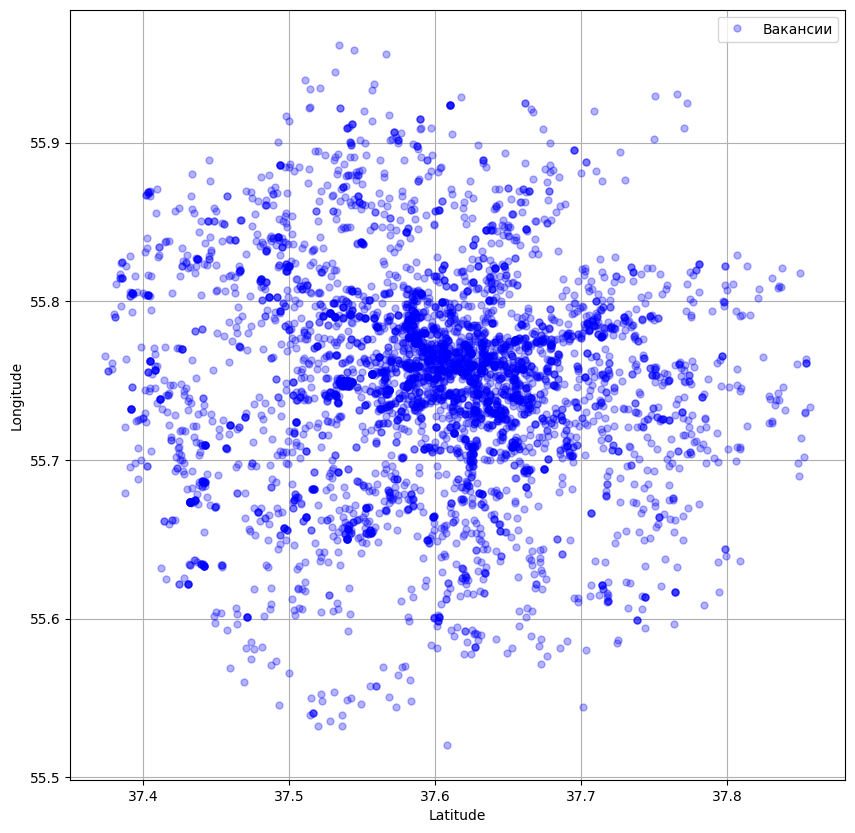

In [239]:
longitudes = [vacancy['address']['lng'] for vacancy in vacancies_inside_mcr]
latitudes = [vacancy['address']['lat'] for vacancy in vacancies_inside_mcr]

plt.figure(figsize=(10, 10))
plt.plot(longitudes, latitudes, 'bo', markersize=5, alpha=0.3, label='Вакансии')
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [240]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scattermapbox(
    lat=latitudes,
    lon=longitudes,
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.3,
        color='blue'
    ),
    name='vacancies'
))

fig.update_layout(
    mapbox=dict(
        style="carto-positron",
        center=dict(lat=coords_moscow[0], lon=coords_moscow[1]),
        zoom=9
    )
)

fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ближе к центру Москвы находится больше самых различных вакансий, в виду большей плотности количества работодателей. По окраинам же, в свою очередь, больше спальных районов, что уменьшает необходимость в найме.
Также можно отметить отсутствие предложений о найме в районе Лосиного острова, ведь там, что логично, не может быть нанимателей.

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [241]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 69.0MB/s]


Создадим DataFrame:

In [242]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [243]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [244]:
len(diamonds)

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [245]:
id_max = str(diamonds['total_sales_price'].idxmax())
max = str(diamonds['total_sales_price'].max())
id_min = str(diamonds['total_sales_price'].idxmin())
min = str(diamonds['total_sales_price'].min())
print(id_min + ' - ' + min)
print(id_max + ' - ' + max)

0 - 200
219702 - 1449881


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [246]:
diamonds.isin(['unknown', None]).sum().sum()

1746027

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [247]:
diamonds.columns[diamonds.isin(['unknown', None]).any()]

Index(['color', 'cut_quality', 'eye_clean', 'culet_size', 'culet_condition',
       'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity',
       'fancy_color_dominant_color', 'fancy_color_secondary_color',
       'fancy_color_overtone', 'fancy_color_intensity'],
      dtype='object')

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [248]:
cool_columns = diamonds.columns[diamonds.columns.str.startswith('fancy_color_') | diamonds.columns.str.startswith('fluor_')]

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [249]:
(~diamonds.isin(['unknown', None])).sum()[cool_columns].sum()

256727

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [250]:
diamonds.drop(columns=cool_columns, inplace=True)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [251]:
diamonds.drop(columns=diamonds.columns[diamonds.columns.str.startswith('culet')], inplace=True)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [252]:
diamonds['total_sales_price'].sum() / 1000

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [253]:
diamonds.iloc[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [254]:
diamonds.iloc[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [255]:
some_dataset = diamonds.select_dtypes(include='object')
some_dataset

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

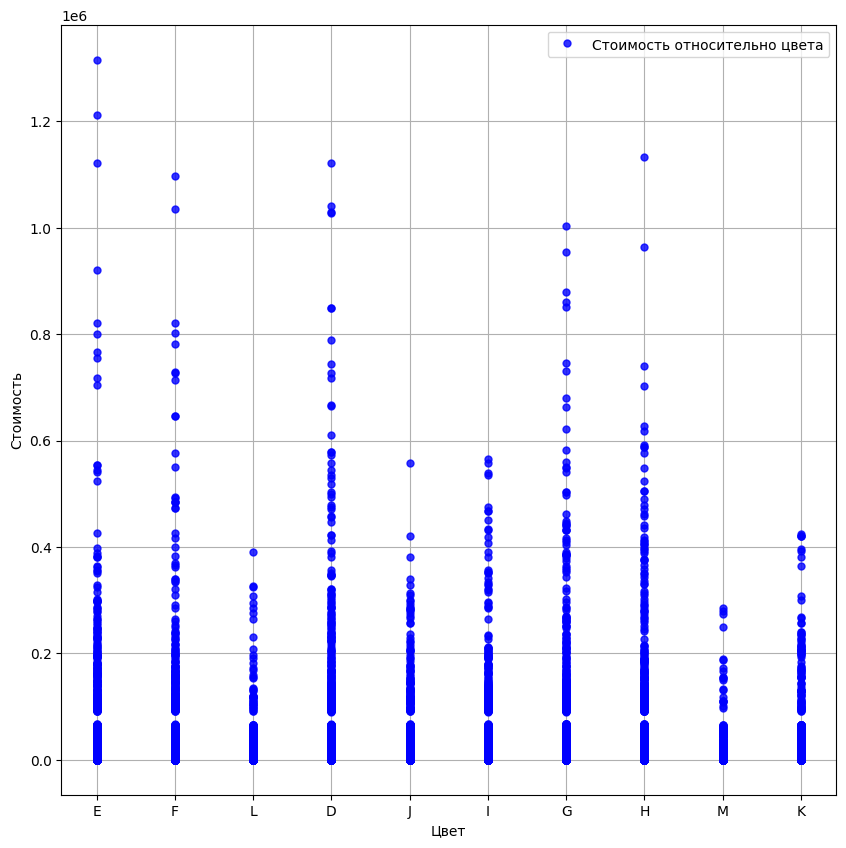

In [256]:
temporary_df = diamonds.replace('unknown', None).dropna(subset=['color', 'total_sales_price'])
plt.figure(figsize=(10, 10))
plt.plot(temporary_df['color'], temporary_df['total_sales_price'], 'bo', markersize=5, alpha=0.8, label='Стоимость относительно цвета')
plt.xlabel('Цвет')
plt.ylabel('Стоимость')
plt.legend()
plt.grid(True)
plt.show()

(2 балла) Постройте график `лабораторная оценка - кол-во бриллиантов`:

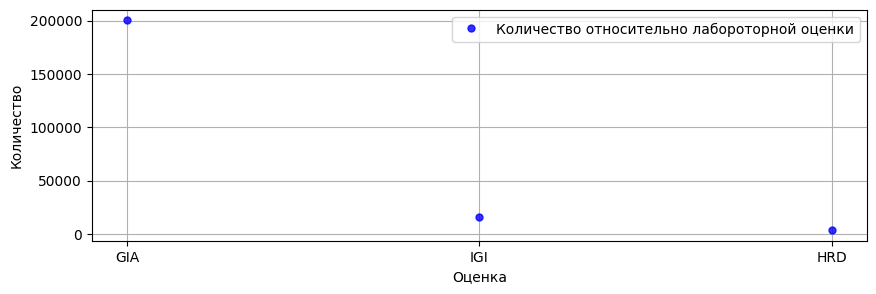

In [257]:
temporary_df = diamonds.replace('unknown', None).dropna(subset=['lab'])
temporary_count = temporary_df['lab'].value_counts()
plt.figure(figsize=(10, 3))
plt.plot(temporary_count.index, temporary_count.values, 'bo', markersize=5, alpha=0.8, label='Количество относительно лабороторной оценки')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

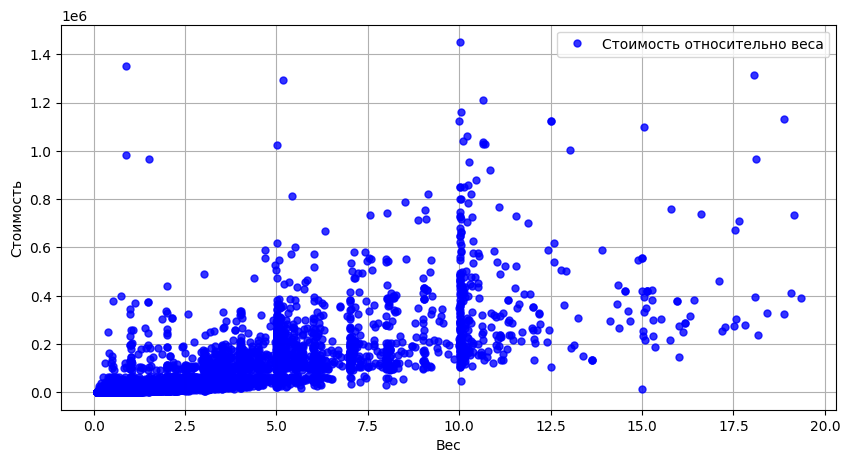

In [258]:
temporary_df = diamonds.replace('unknown', None).dropna(subset=['carat_weight', 'total_sales_price'])
plt.figure(figsize=(10, 5))
plt.plot(temporary_df['carat_weight'], temporary_df['total_sales_price'], 'bo', markersize=5, alpha=0.8, label='Стоимость относительно веса')
plt.xlabel('Вес')
plt.ylabel('Стоимость')
plt.legend()
plt.grid(True)
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

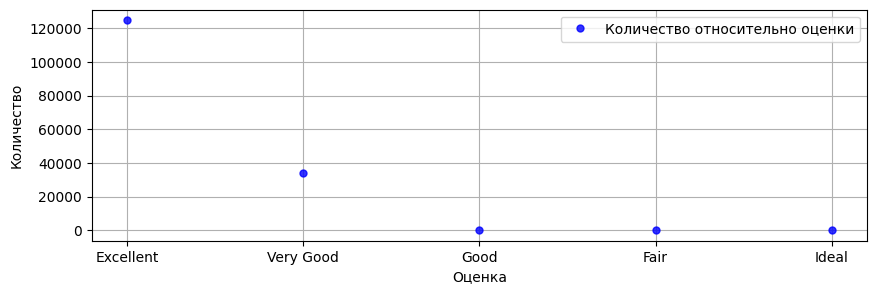

In [259]:
temporary_df = diamonds.replace('unknown', None).dropna(subset=['cut_quality'])
temporary_count = temporary_df['cut_quality'].value_counts()
plt.figure(figsize=(10, 3))
plt.plot(temporary_count.index, temporary_count.values, 'bo', markersize=5, alpha=0.8, label='Количество относительно оценки')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend()
plt.grid(True)
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Стоимость бриллианта во многом зависит от его размера, но мало зависит от его цвета.
Количество бриллиантов уменьшается по мере улучшения лабороторных и GIA-оценок

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [260]:
need_columns = ['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']
df = diamonds[need_columns]

(1 балл) Перемешайте строки в датафрейме случайным образом:

In [261]:
df.sample(frac=1).reset_index()

,index,meas_length,meas_width,meas_depth,total_sales_price
0,63552,4.78,4.79,2.91,1024
1,99550,5.18,3.71,2.75,1586
2,111941,5.15,5.18,3.19,2098
3,109379,5.09,5.11,3.17,1910
4,95485,0.00,0.00,0.00,1440
...,...,...,...,...,...
219698,63005,4.29,4.31,2.60,1020
219699,111893,5.04,5.06,2.97,2094
219700,155363,5.96,6.00,3.71,3996
219701,48099,3.93,3.96,2.34,918


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [262]:
df['minkowskii'] = df.apply(lambda row: (row['meas_length']**3 + row['meas_width']**3 + row['meas_depth']**3)**(1/3), axis = 1)
df

<ipython-input-262-fad8e24fbd28>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,meas_length,meas_width,meas_depth,total_sales_price,minkowskii
0,2.85,2.87,1.79,200,3.745015
1,2.84,2.89,1.78,200,3.748797
2,2.88,2.90,1.77,200,3.775608
3,2.86,2.88,1.78,200,3.754425
4,2.79,2.83,1.82,200,3.694108
...,...,...,...,...,...
219698,14.06,14.18,8.66,1210692,18.449681
219699,11.55,8.81,5.71,1292500,13.408649
219700,17.06,17.10,10.20,1315496,22.257728
219701,5.22,4.90,3.47,1350000,6.706710


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [263]:
need_columns = ['minkowskii', 'total_sales_price']
df2 = df[need_columns]
df2

,minkowskii,total_sales_price
0,3.745015,200
1,3.748797,200
2,3.775608,200
3,3.754425,200
4,3.694108,200
...,...,...
219698,18.449681,1210692
219699,13.408649,1292500
219700,22.257728,1315496
219701,6.706710,1350000


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [264]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.2)

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

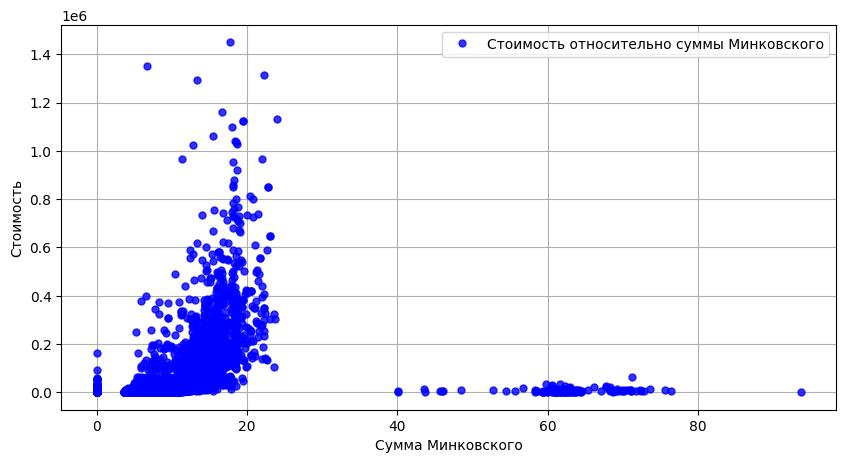

In [265]:
plt.figure(figsize=(10, 5))
plt.plot(train['minkowskii'], train['total_sales_price'], 'bo', markersize=5, alpha=0.8, label='Стоимость относительно cуммы Минковского')
plt.xlabel('Сумма Минковского')
plt.ylabel('Стоимость')
plt.legend()
plt.grid(True)
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

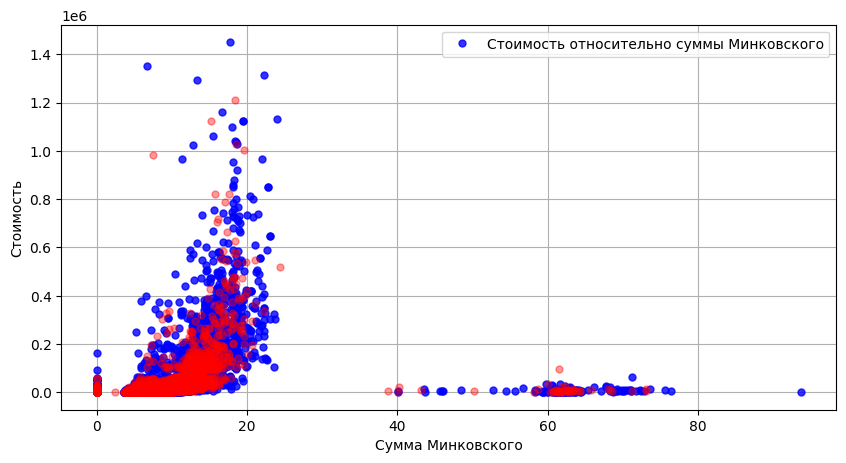

In [266]:
plt.figure(figsize=(10, 5))
plt.plot(train['minkowskii'], train['total_sales_price'], 'bo', markersize=5, alpha=0.8, label='Стоимость относительно cуммы Минковского')
plt.plot(test['minkowskii'], test['total_sales_price'], 'ro', markersize=5, alpha=0.4)
plt.xlabel('Сумма Минковского')
plt.ylabel('Стоимость')
plt.legend()
plt.grid(True)
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [267]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [269]:
from sklearn.preprocessing import OneHotEncoder

used_features = ['lab', 'cut_quality']
diamonds = diamonds.replace('unknown', None).dropna(subset=used_features)
diamonds.reset_index()
df3 = diamonds[used_features]

encoder = OneHotEncoder(sparse_output=False)
encoded_df = pd.DataFrame(encoder.fit_transform(df3), columns=encoder.get_feature_names_out(used_features))
encoded_df

,lab_GIA,lab_HRD,lab_IGI,cut_quality_Excellent,cut_quality_Fair,cut_quality_Good,cut_quality_Ideal,cut_quality_Very Good
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
159091,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
159092,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
159093,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
159094,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [270]:
train_x, test_x, train_y, test_y = train_test_split(encoded_df, diamonds['total_sales_price'], test_size=0.2)

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [271]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(train_x, train_y)

DecisionTreeRegressor()

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [272]:
from sklearn.metrics import mean_squared_error
answers = model.predict(test_x)
mean_squared_error(test_y, answers)

418203800.1041717

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Достаточно высокое квадратичное отклонение во многом показывает что двух признаков недостаточно, чтобы адекватно оценить стоимость. Тем не менее такие признаки как чистота, качество огранки и экспертная оценка значительно влияют на стоимость, позволяя делать относительно точные предсказание